# Credit EDA Case Study 

In [26]:
# Importing all libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

# Reading the data 

In [27]:
eda=pd.read_csv("application_data.csv")

In [28]:
eda.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
eda.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [30]:
eda.shape

(307511, 122)

#  Checking Null Values

In [31]:
#checking for percentage of missing values in each column
Null_col=eda.isnull().sum()/len(eda)*100
Null_col.sort_values(ascending=False)


COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
                              ...    
NAME_HOUSING_TYPE            0.000000
NAME_FAMILY_STATUS           0.000000
NAME_EDUCATION_TYPE          0.000000
NAME_INCOME_TYPE             0.000000
SK_ID_CURR                   0.000000
Length: 122, dtype: float64

In [32]:

Null_col=Null_col[Null_col.values>50.0]
len(Null_col)

41

In [33]:
# Droping These 41 columns

In [34]:
Null_col=list(Null_col[Null_col.values>=50].index)
eda.drop(labels=Null_col,axis=1,inplace=True)
print(len(Null_col))

41


In [35]:
# Checking null percentage of column having less percentage
(eda.isnull().sum()/len(eda)*100)


SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 81, dtype: float64

In [36]:
#checking for coloums having less than 19% null value
Null_col=eda.isnull().sum()/len(eda)*100
Null_col=Null_col[Null_col.values < 19.0].sort_values(ascending =False)
print(Null_col)
len(Null_col)

AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
                                 ...    
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
TARGET                          0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
Length: 71, dtype: float64


71

# Exploring the data 

 1. Analysis of AMT_ANNUITY column

In [37]:
eda.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

<AxesSubplot:xlabel='AMT_ANNUITY'>

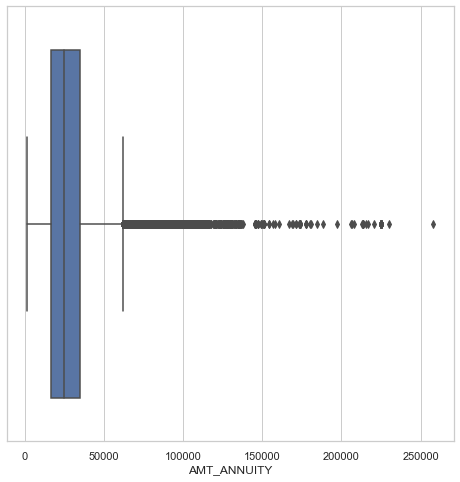

In [38]:
sns.set(rc={'figure.figsize':(8,8)})
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
sns.boxplot(x=eda["AMT_ANNUITY"])

In [39]:
# As we can see here in this coloum there is an outlier so mean is not a good option to fill so we will be filling 
#it by median  and diffrence is also severe in max and min

In [40]:
# Filling missing values with median

values=eda['AMT_ANNUITY'].median()

eda.loc[eda['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=values

In [41]:
# ReChecking  column for null values

eda.isnull().sum().sort_values(ascending=False)

FLOORSMAX_AVG                   153020
FLOORSMAX_MODE                  153020
FLOORSMAX_MEDI                  153020
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BEGINEXPLUATATION_MODE    150007
                                 ...  
NAME_HOUSING_TYPE                    0
NAME_FAMILY_STATUS                   0
NAME_EDUCATION_TYPE                  0
NAME_INCOME_TYPE                     0
SK_ID_CURR                           0
Length: 81, dtype: int64

#It can be seen that AMT_ANNUITY has 0 null value

#Now we will drop the columns which are not useful

In [42]:
#NotInf=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       #'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL', 'REGION_RATING_CLIENT',
       #'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       #'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       #'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       #'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

#eda.drop(labels=NotInf,axis=1,inplace=True)

2. Analysis of CNT_FAM_MEMBERS

Now we will check rows as well for Null values or missing values

In [43]:
#checking count of family members
eda['CNT_FAM_MEMBERS'].value_counts(dropna=False)

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
NaN          2
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

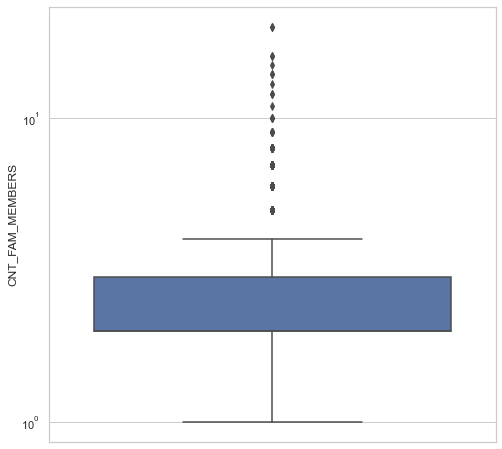

In [44]:
#plotting the values of CNT_FAM_MEMBERS column using box plot to detect outliers
sns.boxplot(y=eda['CNT_FAM_MEMBERS'])
plt.yscale('log')
plt.show()

In [45]:

eda.CNT_FAM_MEMBERS.describe()


count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [46]:
eda.CNT_FAM_MEMBERS.median()

2.0

In [47]:
# Filling missing values with median
fillMissingVal=eda['CNT_FAM_MEMBERS'].median()
eda['CNT_FAM_MEMBERS'].fillna(value = fillMissingVal, inplace =True)

In [48]:
# Checking the columns having less null percentage
eda.isnull().sum()/len(eda)*100


SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 81, dtype: float64

In [49]:


Null_row=eda.isnull().sum(axis=1)
Null_row.sort_values(ascending=False)

244833    20
53550     20
12087     20
185713    20
54457     20
          ..
160684     0
160683     0
160681     0
160659     0
307510     0
Length: 307511, dtype: int64

So we can check there are no rows value is null

In [50]:
eda.isnull().sum()


SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 81, dtype: int64

3. Analysis of Code gender

In [51]:
eda.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

As we can see still there are some null values in form of XNA No we will be converting these value 

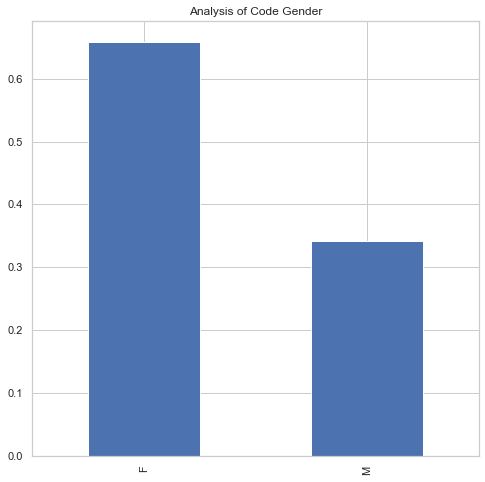

In [52]:
#As we can see this is Categorical value so we can replace it with mean so we will be replacing it with Mode as F is the highest value
eda.loc[eda['CODE_GENDER']=='XNA','CODE_GENDER']='F'
eda['CODE_GENDER'].value_counts()
#plotting  the bar graph of CODE_GENDER
eda['CODE_GENDER'].value_counts(normalize=True).plot.bar(title='Analysis of Code Gender')
plt.show()

4. Analysis of ORGANIZATION_TYPE

In [53]:
eda["ORGANIZATION_TYPE"].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [54]:
#There are XNA = 55374 times in the data
eda["ORGANIZATION_TYPE"].describe()

count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

In [55]:
#Taking out percentage 
55374/307511*100

18.00716071945394

As we can see the total count of XA is around 18%
so we can drop this which will not impact much on the data


In [56]:
eda=eda.drop(eda.loc[eda['ORGANIZATION_TYPE']=='XNA'].index)
eda[eda['ORGANIZATION_TYPE']=='XNA'].shape

(0, 81)

In [57]:
# confirm again to check whether column is dropped or not 
eda["ORGANIZATION_TYPE"].value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

5. Analysis of AMT_GOODS_PRICE

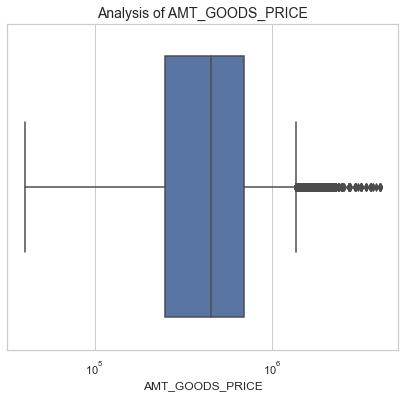

In [58]:
#box plotting the values of AMT_GOODS_PRICE
plt.figure(figsize=(7,6))
sns.boxplot(x=eda['AMT_GOODS_PRICE'])
plt.xscale('log') #to display matplotlib.pyplot with a logarithmic y-axis scale.
plt.title("Analysis of AMT_GOODS_PRICE",fontsize=14)
plt.show()

In [59]:
eda.AMT_GOODS_PRICE.describe()

count    2.518810e+05
mean     5.494057e+05
std      3.732685e+05
min      4.050000e+04
25%      2.475000e+05
50%      4.500000e+05
75%      6.930000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [60]:
eda.AMT_GOODS_PRICE.median()

450000.0

Observation :
We are not getting any clear understanding of the data, so we would keep the null values.

6. Analysis of AMT_REQ_CREDIT_BUREAU_DAY

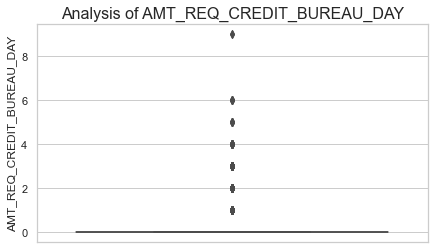

In [61]:
plt.figure(figsize=(7,4))
sns.boxplot(y=eda['AMT_REQ_CREDIT_BUREAU_DAY'])
plt.title("Analysis of AMT_REQ_CREDIT_BUREAU_DAY",fontsize=16)
plt.show()

In [62]:
eda['AMT_REQ_CREDIT_BUREAU_DAY'].describe()

count    218281.000000
mean          0.006977
std           0.111020
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [63]:
eda['AMT_REQ_CREDIT_BUREAU_DAY'].median()

0.0

Conclusiom :
AMT_REQ_CREDIT_BUREAU_DAY has outliers need to be removed or capped as we can see and for missing value fillup we need to use the median in this case.

In [64]:
col_of_outliers=['AMT_REQ_CREDIT_BUREAU_DAY']
for col in col_of_outliers:
    percentiles = eda[col].quantile([0.01,0.99]).values
    eda[col][eda[col] <= percentiles[0]] = percentiles[0]
    eda[col][eda[col] >= percentiles[1]] = percentiles[1] 

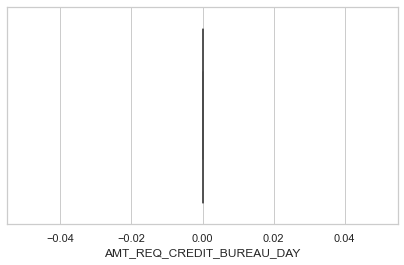

In [65]:
# plotting graph
plt.figure(figsize=(7,4))
sns.boxplot(x=eda['AMT_REQ_CREDIT_BUREAU_DAY'])
plt.show()

In [66]:
# Checking the data types of column
eda.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 81, dtype: object

In [67]:
# Casting all variable into numeric in the dataset
numeric_cols=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

eda[numeric_cols]=eda[numeric_cols].apply(pd.to_numeric)
eda.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Binning

Creating range for easier visualization

Now, Creating bins for continous variable categories column 'AMT_INCOME_TOTAL' and 'AMT_CREDIT'

In [68]:
# Creating bins for income amount
bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']


eda['AMT_INCOME_RANGE']=pd.cut(eda['AMT_INCOME_TOTAL'],bins,labels=slot)

In [69]:
# Creating bins for AMT_CREDIT

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

eda['AMT_CREDIT_RANGE']=pd.cut(eda['AMT_CREDIT'],bins=bins,labels=slots)

In [70]:
# Segement the customer on behalf of target=1(who default loan) and target=0(paying loan )

target0=eda.loc[eda["TARGET"]==0]
target1=eda.loc[eda["TARGET"]==1]


### Checking Imbalance 

In [71]:
    
# So the value of defaulter(target=0) is less as compared to who are paying loan (target=1)

len(target0)/len(target1)

10.547378062743302

## Univariate analysis for categorical order

In [72]:
# Count plotting in logarithmic scale

def uniplot(eda,col,title,hue = None):
    
    sns.set_style('darkgrid')
    sns.set_context('poster')
    plt.rcParams["axes.labelsize"] = 15
    plt.rcParams['axes.titlesize'] = 18
    plt.rcParams['axes.titlepad'] = 30
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(eda[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.yscale('log')
    plt.title(title,fontsize=14)
    ax = sns.countplot(data=eda, x=col, hue=hue, palette='bright') 
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    plt.show()

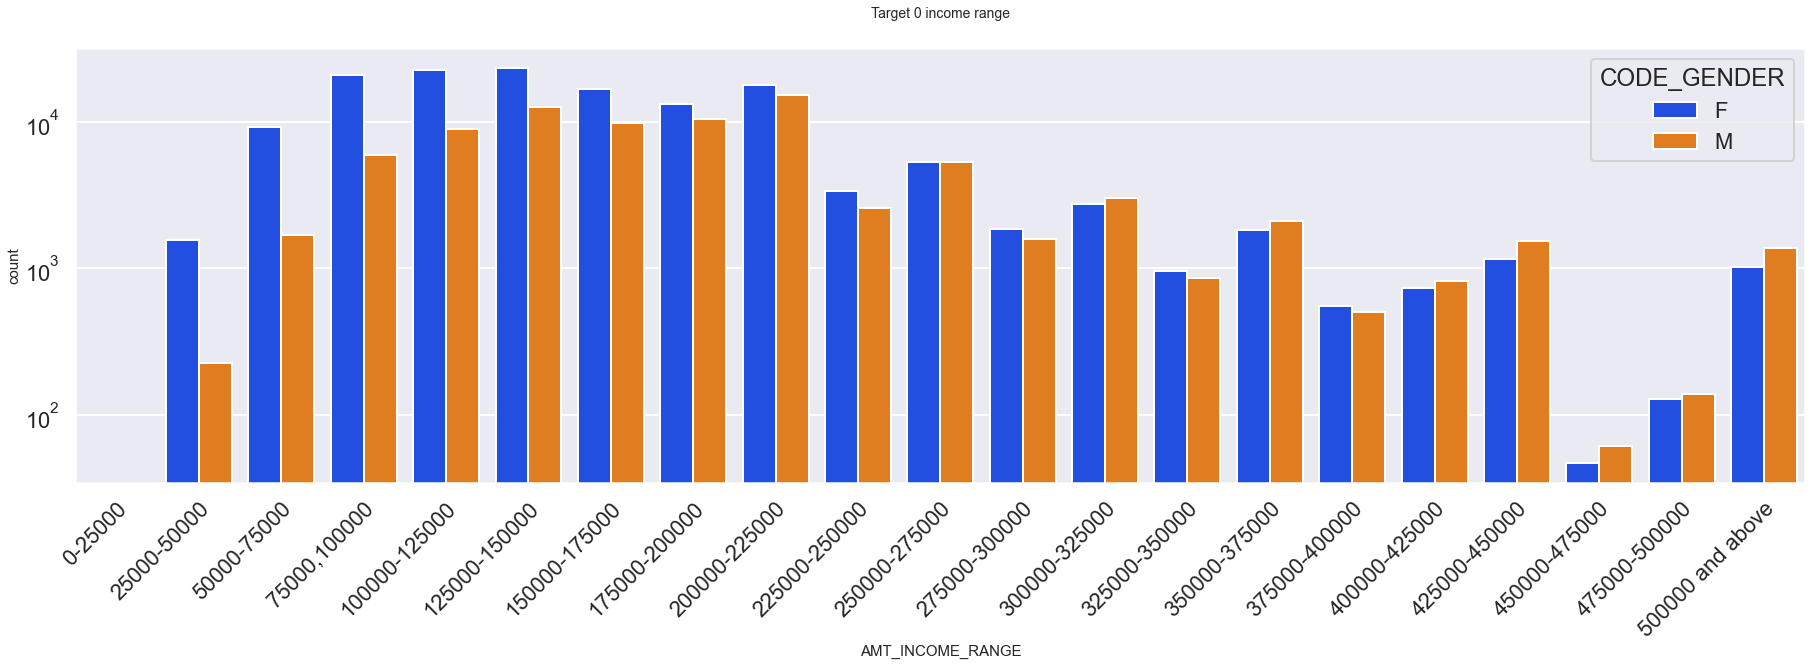

In [73]:
# Plotting for income range for target 0

uniplot(target0,col='AMT_INCOME_RANGE',title='Target 0 income range',hue='CODE_GENDER')


Observation from the above graph for target=0(Non-Defaulters).
1. Counts of females are higher
2. Credits of female are more compare to male 

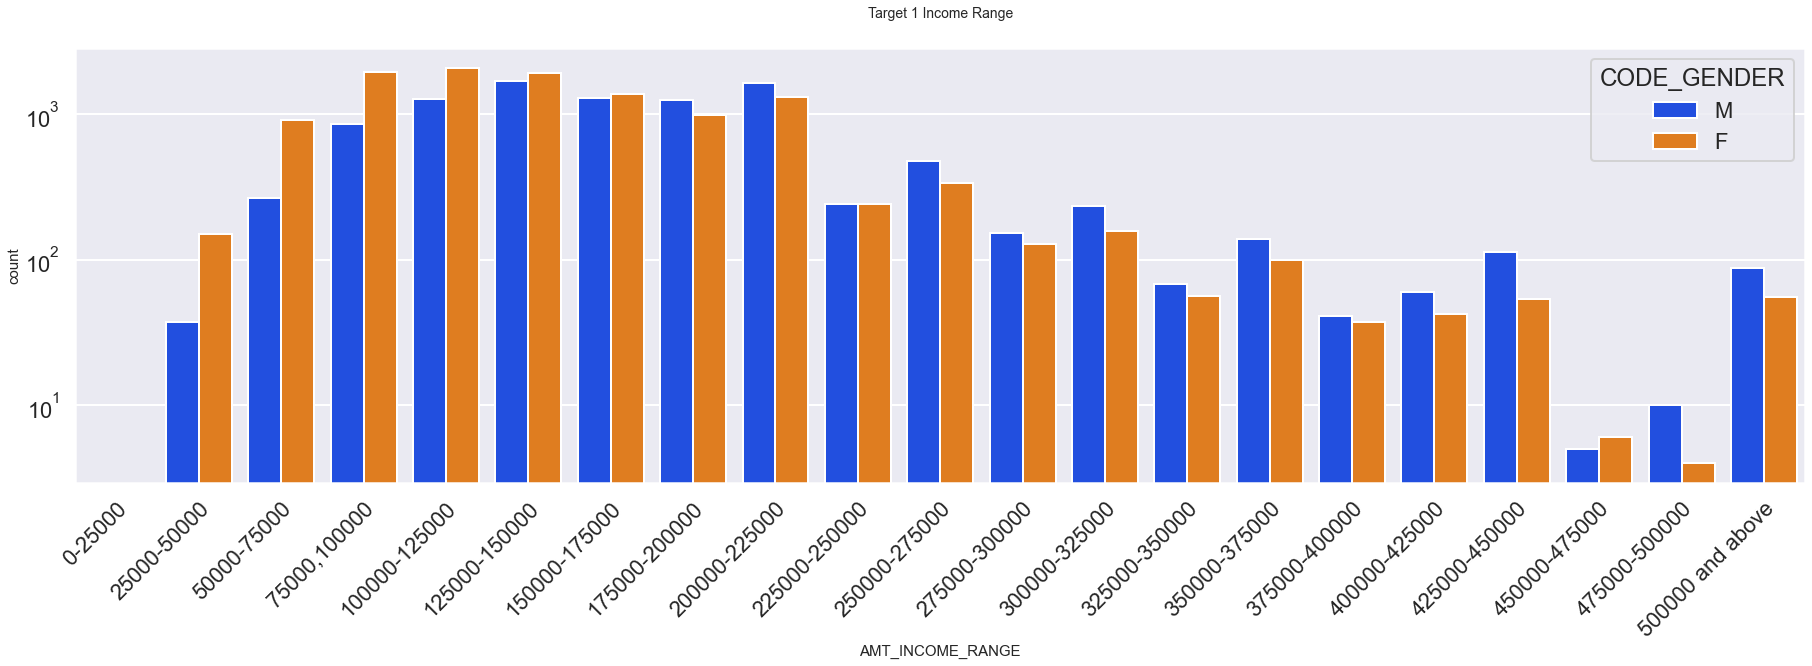

In [74]:
# Plotting for income range for target1
uniplot(target1,col='AMT_INCOME_RANGE',title='Target 1 Income Range',hue='CODE_GENDER')

Inference:
Points to be concluded from the above graph for Target=1 (Defaulters).
1. Counts of male are higher.
2. Between 100000 and 200000 males are more 

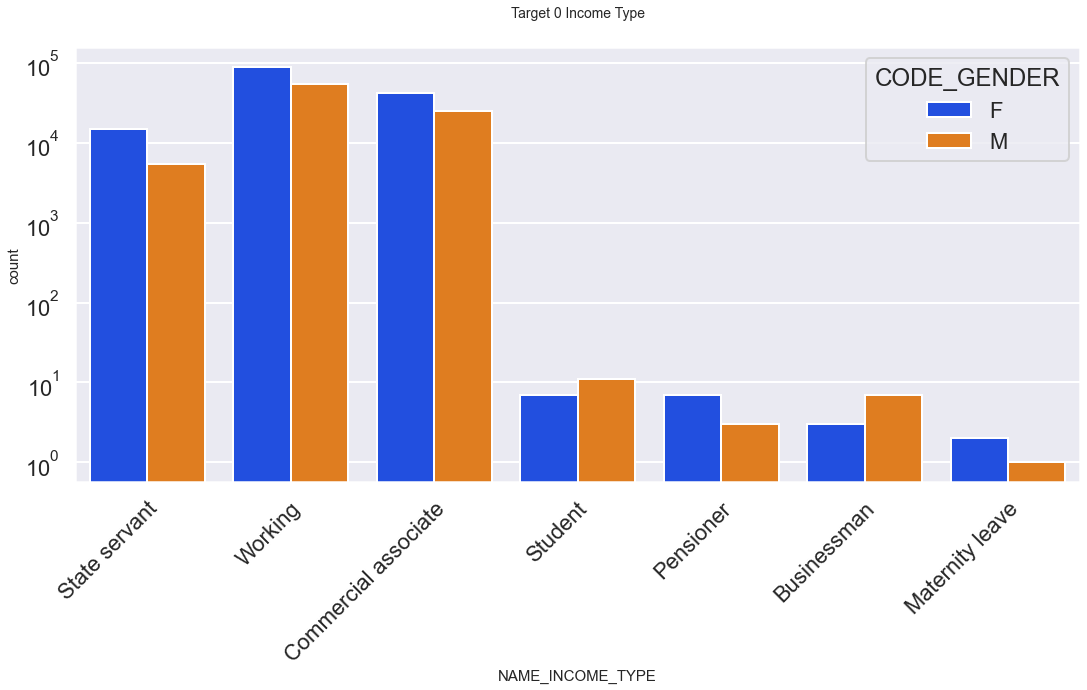

In [75]:
# Plotting for Income type for target 0
uniplot(eda.loc[eda["TARGET"]==0],col='NAME_INCOME_TYPE',title='Target 0 Income Type',hue='CODE_GENDER')

##### From above graph we can infer
###### 1.For income type "Student","Businessman","pensioner" and "Maternity leave" have less income.
###### 2.Here also cleary seen females have more number of credits than male.
###### 3.The number of credits are higher for income type "working", "commercial associate", and "State Servant".

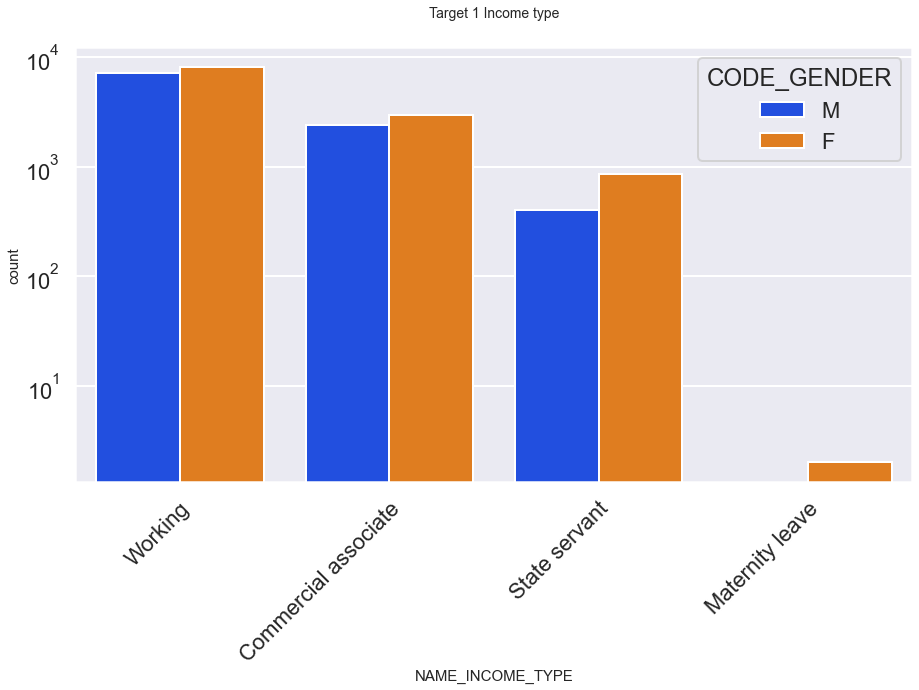

In [76]:
# Plotting for Income type

uniplot(target1,col='NAME_INCOME_TYPE',title='Target 1 Income type',hue='CODE_GENDER')

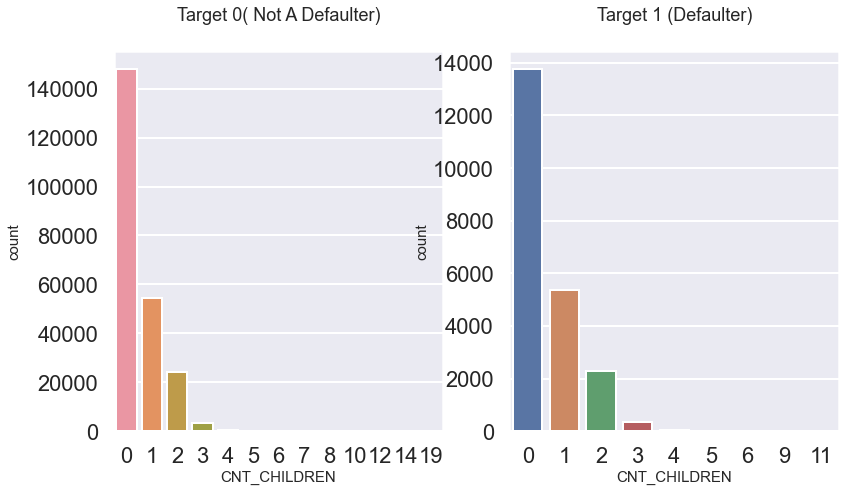

In [77]:
# Plotting for CNT_CHILDREN for target0 and target1
fig, ax =plt.subplots(1,2,figsize=(13,7))
sns.countplot(target0['CNT_CHILDREN'], ax=ax[0]).set_title('Target 0( Not A Defaulter)')
sns.countplot(target1['CNT_CHILDREN'], ax=ax[1]).set_title('Target 1 (Defaulter)')
fig.show()


Conclusion from above graph
Low child count maximizes that chances of both being a defaulter and also non defaulter. So this point is not useful to conclude

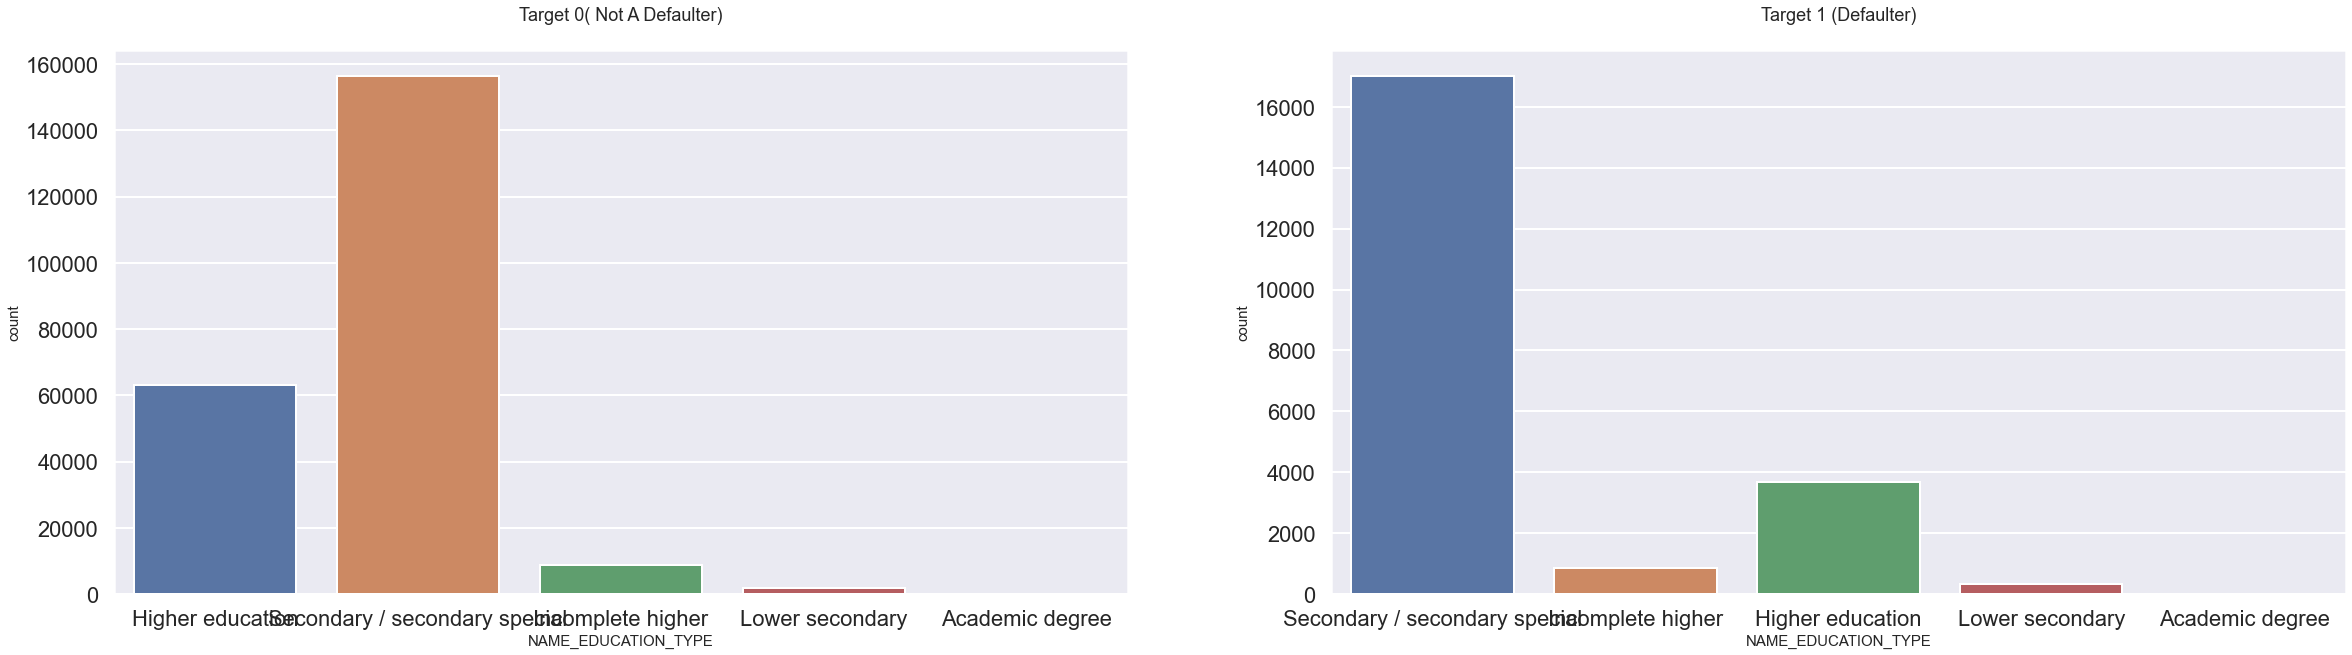

In [78]:
# Plotting for NAME_EDUCATION_TYPE for target0 and target1
fig, ax=plt.subplots(1,2,figsize=(40,10))
sns.countplot(target0['NAME_EDUCATION_TYPE'], ax=ax[0]).set_title('Target 0( Not A Defaulter)')
sns.countplot(target1['NAME_EDUCATION_TYPE'], ax=ax[1]).set_title('Target 1 (Defaulter)')
fig.show()

Conclusion
1.People with secondary education has defaulted the most.

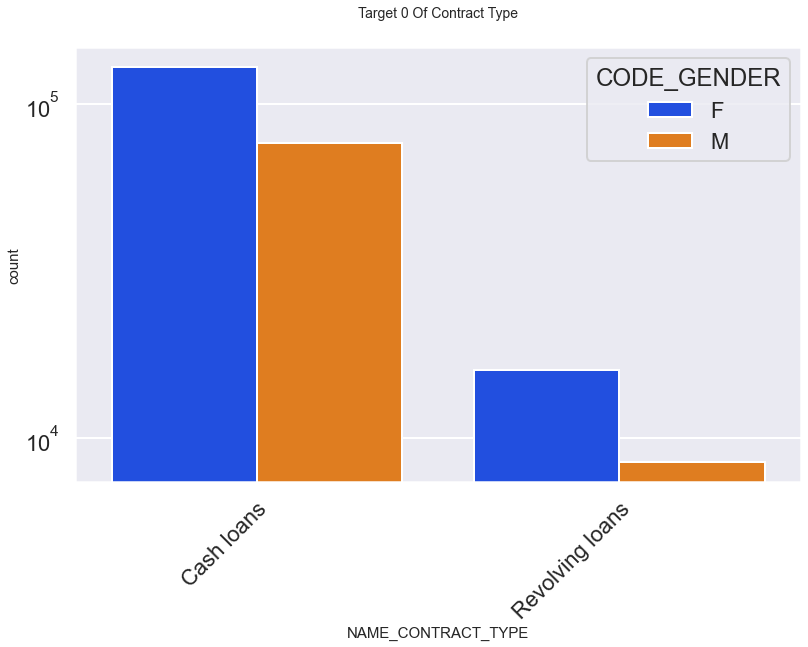

In [79]:
#Plotting for NAME_CONTRACT_TYPE for target0
uniplot(target0,col='NAME_CONTRACT_TYPE',title='Target 0 Of Contract Type',hue='CODE_GENDER')

Conclusion for Target=0 (Non-Defaulters).
1. Cash Loan contracts have a higher number of credit than revolving loan contracts
2. Female count is more than male

In [ ]:
#Plotting for NAME_CONTRACT_TYPE for target1
uniplot(target1,col='NAME_CONTRACT_TYPE',title='Target 1 - Contract Type',hue='CODE_GENDER')

Conclusion:
Points to be concluded from the above graph for Target = 1 (Defaulters).
1. Cash Loan contracts have a higher number of credit than revolving loan contracts
2. Female revolving loans are more compare to male.

Continuous Univariate Analysis

In [ ]:
# Reusable function
def funcBoxPlot(data,col,title):
    sns.set_style('darkgrid')
    sns.set_context('poster')
    plt.rcParams["axes.labelsize"] = 15
    plt.rcParams['axes.titlesize'] = 18
    plt.rcParams['axes.titlepad'] = 30
    
    plt.title(title)
    plt.yscale('log')
    sns.boxplot(data =data, y=col,orient='v',color="orange")
    plt.show()
funcBoxPlot(data=target0,col='AMT_INCOME_TOTAL',title='Target 0 - Income Amount')

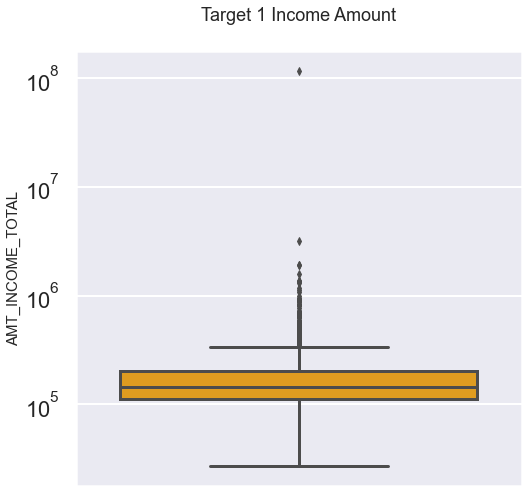

In [82]:
# Distribution of income amount for Target1
funcBoxPlot(data=target1,col='AMT_INCOME_TOTAL',title='Target 1 Income Amount')

Conclusion:

1. For both target 1 and target 0 3rd quartile is narrow
2. 1st quartile have maximum clients income 
3. In both graph outliners can be seen 

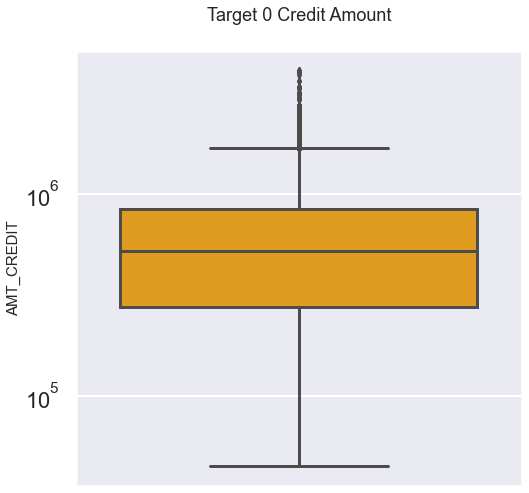

In [83]:
# Disrtibution of credit amount for Target 0
funcBoxPlot(data=target0,col='AMT_CREDIT',title='Target 0 Credit Amount')

In [ ]:
# Disrtibution of credit amount for Target 1
funcBoxPlot(data=target1,col='AMT_CREDIT',title='Target 1 - Credit Amount')

Conclusion:

1. For both target 1 and target 0 3rd quartile is narrow
2. 1st quartile have maximum clients income 
3. In both graph outliners can be seen 

Bivariate Analysis

Analysing correlation for numerical columns for both Target 0 and Target1

In [ ]:
#Plotting Correlation matrix for Target 0 application data
inp0=target0[['SK_ID_CURR','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',
                               'AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','CNT_FAM_MEMBERS','REGION_RATING_CLIENT',
                              'REGION_POPULATION_RELATIVE','DAYS_ID_PUBLISH']]

plt.figure(figsize=(30,30))
sns.heatmap(d.corr(), fmt='.1f', cmap="RdYlGn", annot=True)
plt.title("Correlation Matrix for Non-Defaulters",fontsize=30, pad=20 )
plt.show()

These columns have high correlation values for Target 0.**

AMT_ANNUITY and AMT_INCOME_TOTAL
AMT_INCOME_TOTAL and AMT_GOODS_PRICE
AMT_GOODS_PRICE and AMT_CREDIT
AMT_ANNUITY and AMT_GOODS_PRICE
CNT_FAM_MEMBERS and CNT_CHILDREN
AMT_ANNUITY and AMT_CREDIT

In [ ]:
#Plotting Correlation matrix for Target 1 application data
inp0=target1[['SK_ID_CURR','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',
                               'AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','CNT_FAM_MEMBERS','REGION_RATING_CLIENT',
                              'REGION_POPULATION_RELATIVE','DAYS_ID_PUBLISH']]
f, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(d.corr(), annot=True, fmt='.1f',cmap="RdYlGn", linewidths=.5, ax=ax)
plt.title("Correlation matrix for Clients with payment difficulties",fontsize=30, pad=20 )
plt.show()

CONCLUSION :
Both for Target 0 and Target 1 these columns have high correlation values.

AMT_GOODS_PRICE and AMT_CREDIT
AMT_ANNUITY and AMT_CREDIT
AMT_ANNUITY and AMT_GOODS_PRICE
CNT_FAM_MEMBER and CNT_CHILDREN
AMT_ANNUITY and AMT_INCOME_TOTAL
AMT_INCOME_TOTAL and AMT_GOODS_PRICE

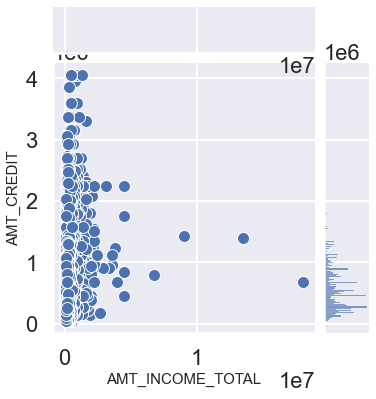

In [85]:
#ploting income vs credit for Target 0
sns.jointplot('AMT_INCOME_TOTAL', 'AMT_CREDIT', target0)
plt.show()

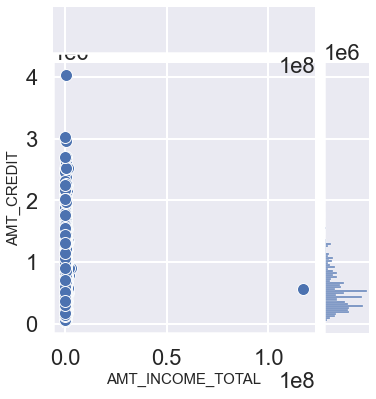

In [86]:
#ploting income vs credit for Target 1
sns.jointplot('AMT_INCOME_TOTAL', 'AMT_CREDIT', target1)
plt.show()

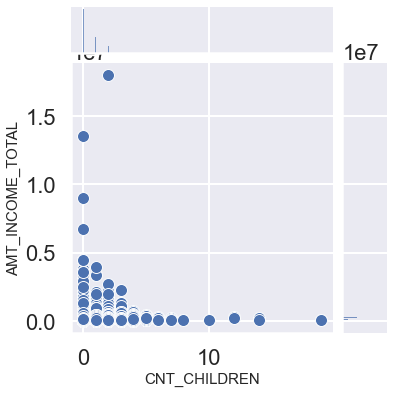

In [87]:
#ploting AMT_INCOME_TOTAL vs CNT_CHILDREN for Target 0
sns.jointplot('CNT_CHILDREN', 'AMT_INCOME_TOTAL', target0)
plt.show()


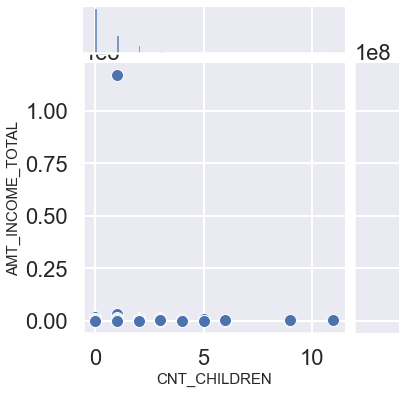

In [88]:
#ploting AMT_INCOME_TOTAL vs CNT_CHILDREN for Target 1
sns.jointplot('CNT_CHILDREN', 'AMT_INCOME_TOTAL', target1)
plt.show()

1. Analysis of Credit amount with respect to Education status

Text(0.5, 1.0, 'Credit Amount vs Education Status For Traget 0')

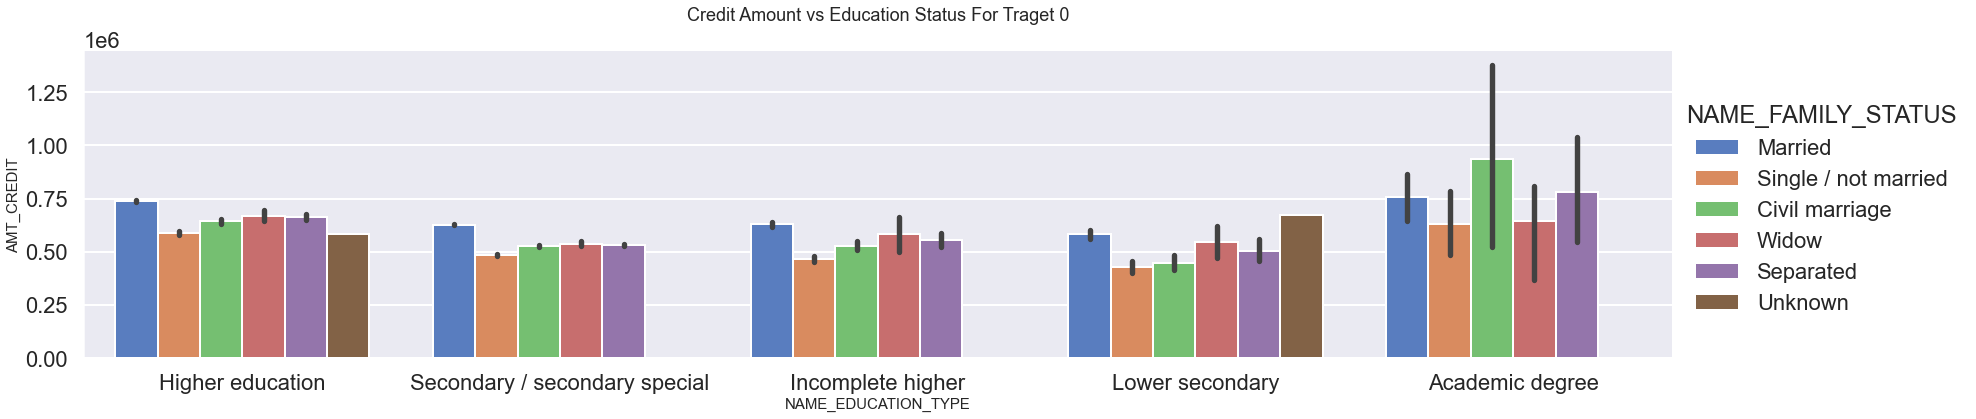

In [89]:
#ploting NAME_EDUCATION_TYPE vs AMT_CREDIT for each family status for Target 0
sns.catplot(data =target0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',height=6,aspect=4, kind="bar", palette="muted")
plt.title('Credit Amount vs Education Status For Traget 0')

Text(0.5, 1.0, 'Credit Amount vs Education Status for Traget 1')

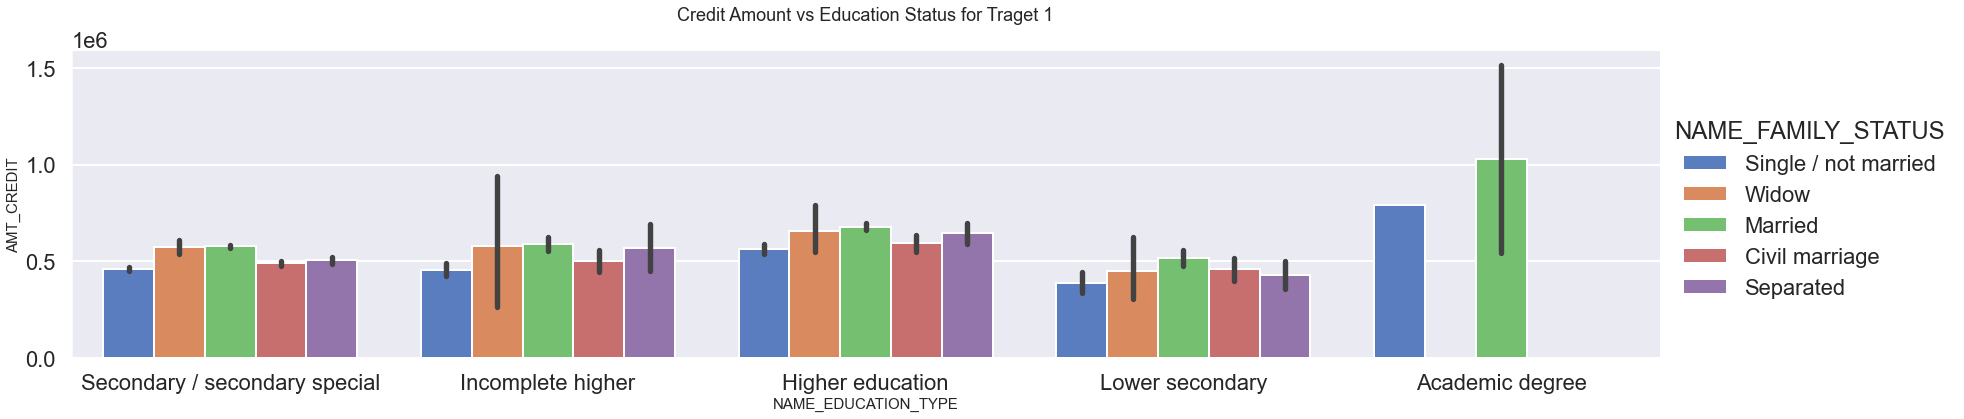

In [90]:
#ploting NAME_EDUCATION_TYPE vs AMT_CREDIT for each family status for target 1
sns.catplot(data =target1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',height=6,aspect=4, kind="bar", palette="muted")
plt.title('Credit Amount vs Education Status for Traget 1')

2. Analysis of Income amount with respect to Education Status

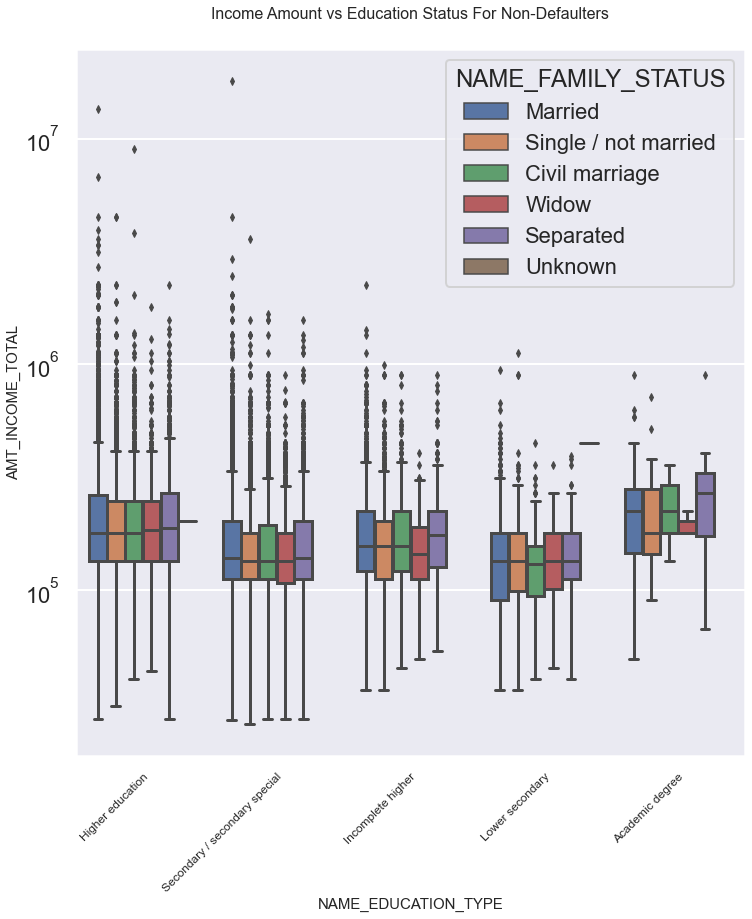

In [96]:
# Box plotting for Income amount vs Education Status for Target 0 in logarithmic scale

import textwrap
plt.figure(figsize=(12,13))
plt.xticks(rotation=45,ha="right",rotation_mode="anchor",fontsize=12)
plt.yscale('log')
g1=sns.boxplot(data =target0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income Amount vs Education Status For Non-Defaulters',fontsize=16)
plt.show()

In [103]:
# Reading the dataset of previous application

eda2=pd.read_csv("previous_application.csv")


In [105]:
# Cleaning the missing data

# listing the null values columns having more than 30%

Null_col1=eda2.isnull().sum()
Null_col1=Null_col1[Null_col1.values>(0.3*len(Null_col1))]
len(Null_col1)

15

In [107]:
# Removing these 15 columns

Null_col1 = list(Null_col1[Null_col1.values>=0.3].index)
eda2.drop(labels=Null_col1,axis=1,inplace=True)

eda2.shape

(1670214, 22)

In [108]:
# Removing the column values of 'XNA' and 'XAP'

eda2=eda2.drop(eda2[eda2['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
eda2=eda2.drop(eda2[eda2['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
eda2=eda2.drop(eda2[eda2['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

eda2.shape

(69635, 22)

In [109]:
# Now merging the Application dataset with previous appliaction dataset

new_eda=pd.merge(left=eda,right=eda2,how='inner',on='SK_ID_CURR',suffixes='_x')

In [110]:
# Renaming the column names after merging

new_eda = new_eda.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)



In [111]:
# Removing unwanted columns for analysis

new_eda.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

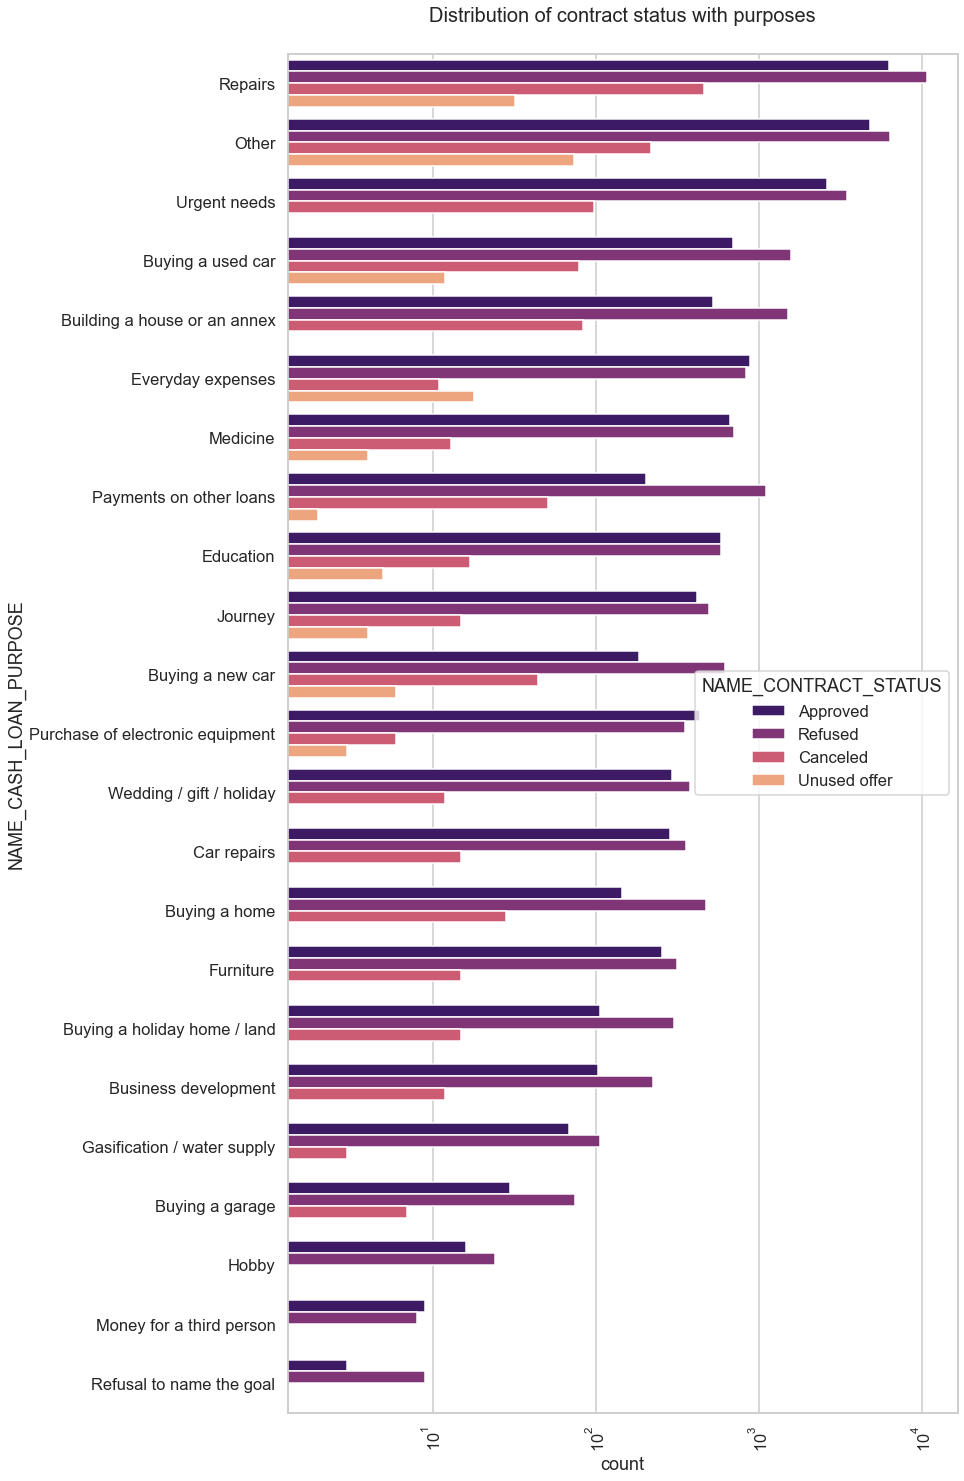

In [112]:
# Distribution of contract status in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(12,25))
plt.rcParams["axes.labelsize"] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titlepad'] = 32
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = new_eda, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_eda['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma')

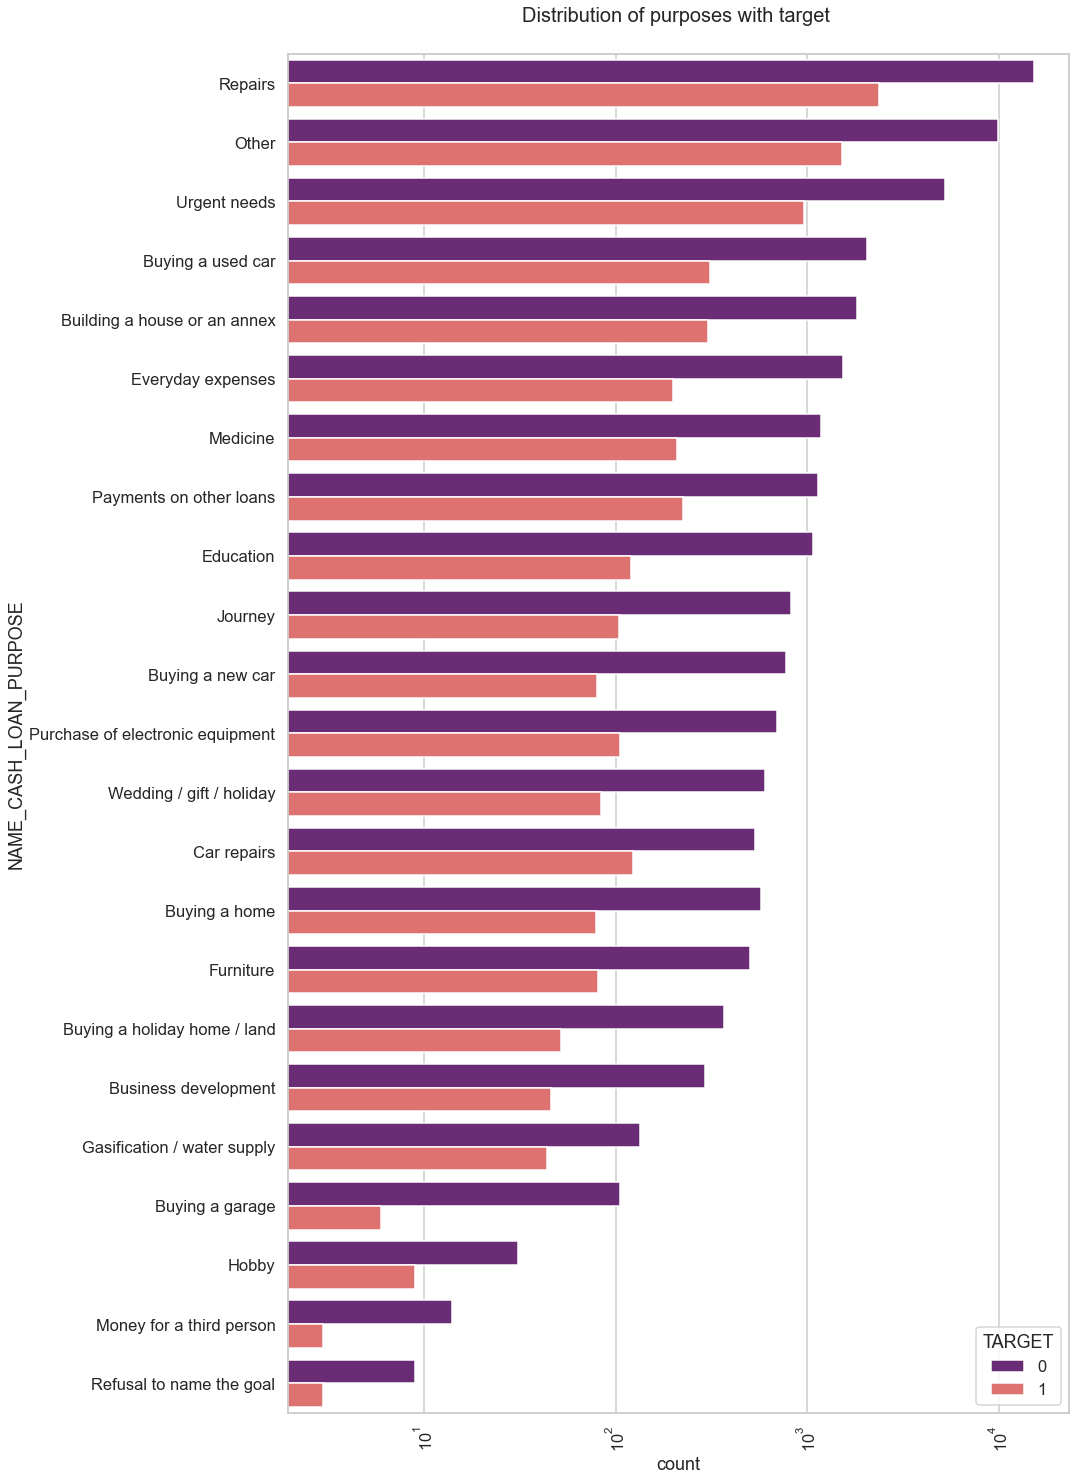

In [113]:
# Distribution of contract status

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(14,25))
plt.rcParams["axes.labelsize"] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titlepad'] = 32
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = new_eda, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_eda['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='magma') 

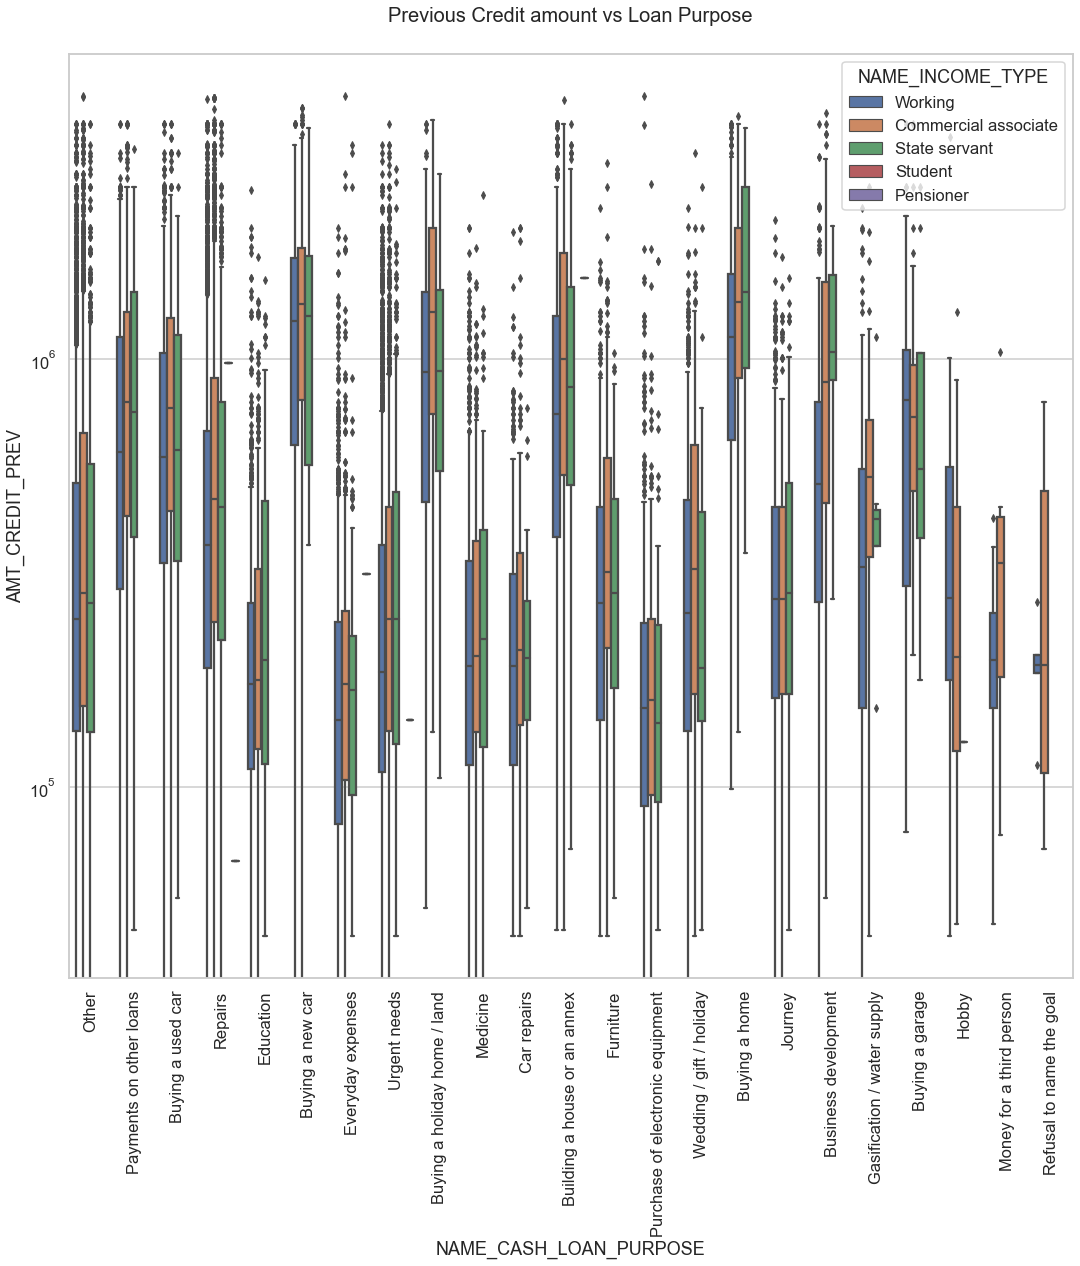

In [123]:
# Box plotting for Credit amount in logarithmic scale

plt.figure(figsize=(18,17))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =new_eda, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',orient='v')
plt.title('Previous Credit amount vs Loan Purpose')
plt.show()

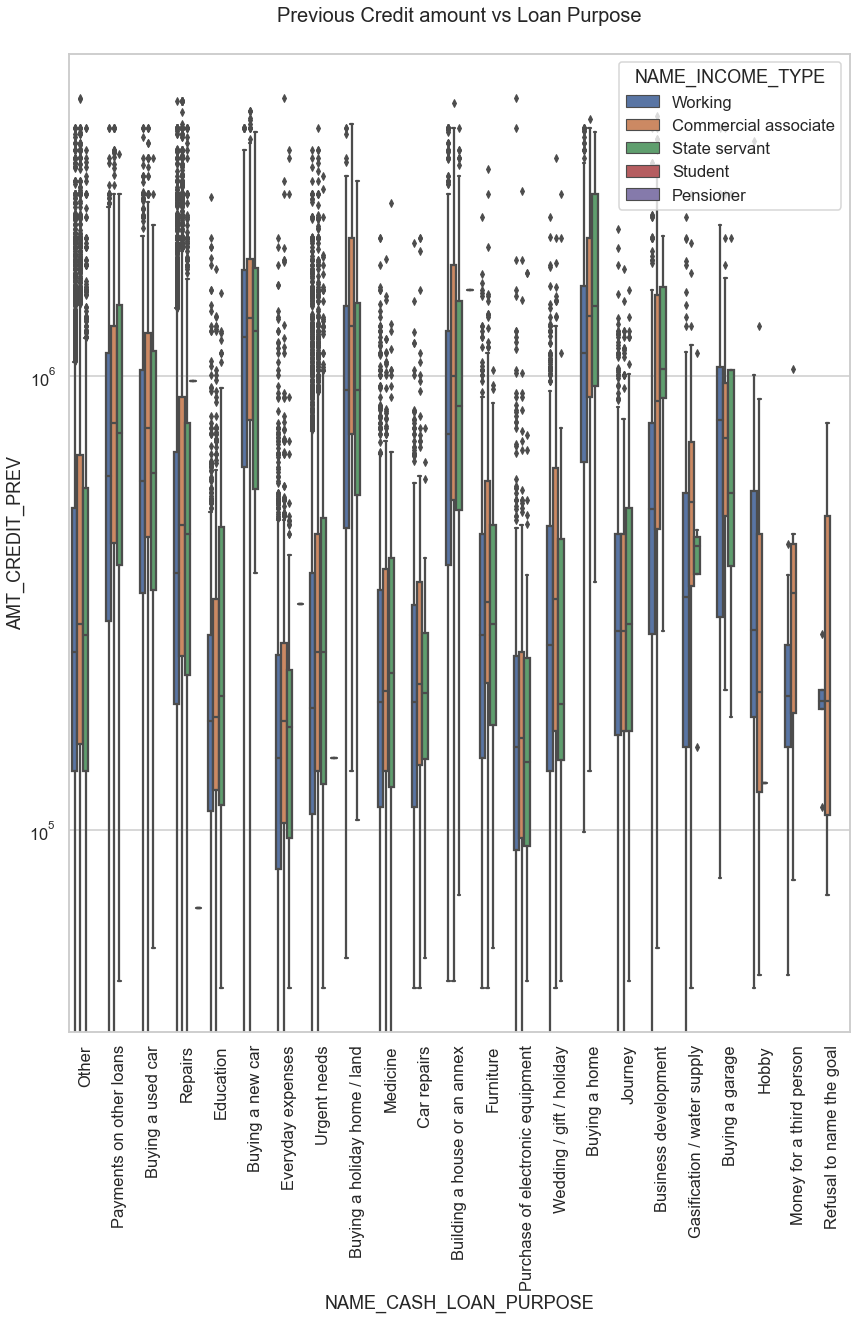

In [122]:
# Box plotting for Credit amount in logarithmic scale

plt.figure(figsize=(14,18))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =new_eda, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',orient='v')
plt.title('Previous Credit amount vs Loan Purpose')
plt.show()

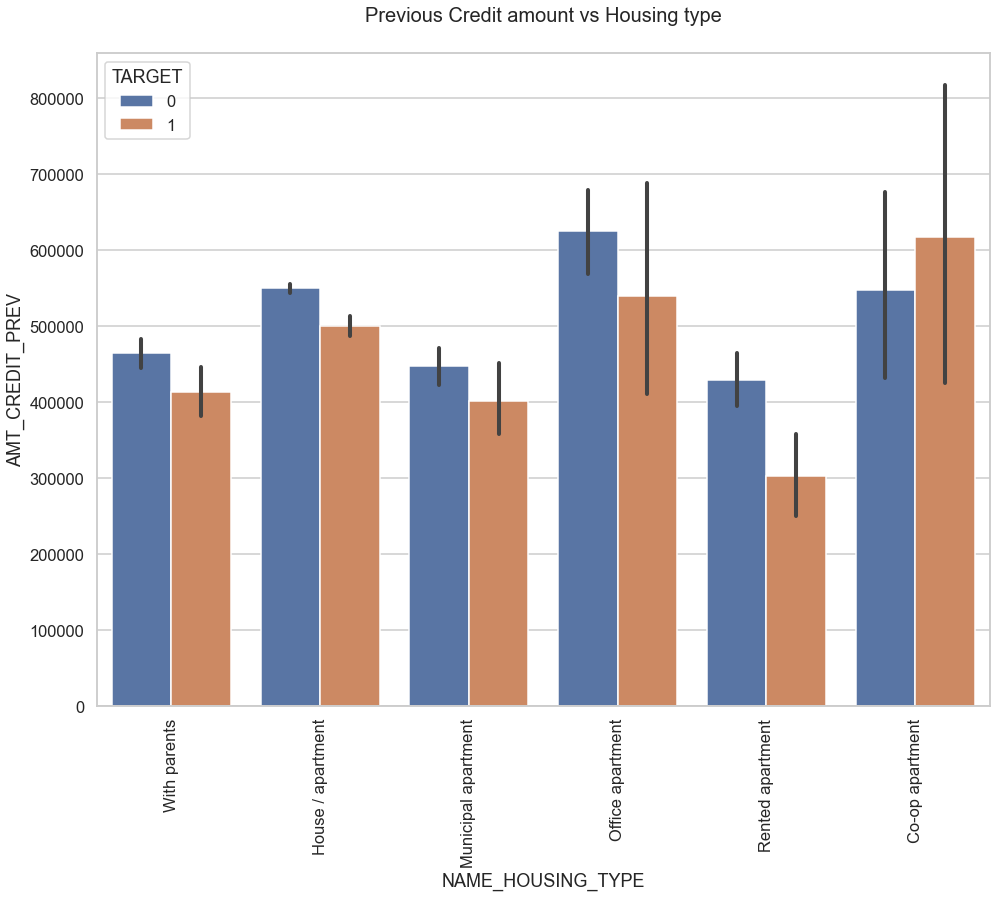

In [121]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =new_eda, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Previous Credit amount vs Housing type')
plt.show()

# CONCLUSION
1. Income type ‘Working’  should focus more by the Bank as they are having most number of unsuccessful payments.

2.Housing type ‘With parents’ are having least number of unsuccessful payments so if we can get as much as client then it will be good .

3.Contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other than ‘Co-op apartment’ should be focussed by Bank for successful payments.

4.Unsuccessful payments on time are from loan purpose 'Repair' are highest.